In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dataframe = pd.read_csv("movie_reviews_data.csv")

In [20]:
dataframe.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


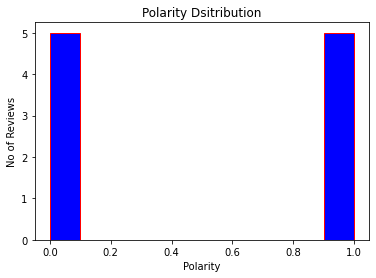

In [21]:
X = dataframe["sentiment"]
labels = ["Positive","Negative"]
plt.xlabel("Polarity")
plt.ylabel("No of Reviews")
plt.title("Polarity Dsitribution")
plt.hist(X,density=True,histtype="bar",facecolor='blue',edgecolor='red')
plt.show()

In [22]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, RegexpTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SRIRAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SRIRAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import re
import string

lemmatizer = WordNetLemmatizer()
stopwordsList = []

def remove_puntc(txt) :
    new_txt = "".join([char for char in txt if char not in string.punctuation])
    return new_txt

def remove_stopwords(text):
    stopwordsList = stopwords.words('english')
    stopwordsList.append('dont')
    stopwordsList.append('didnt')
    stopwordsList.append('doesnt')
    stopwordsList.append('cant')
    stopwordsList.append('couldnt')
    stopwordsList.append('couldve')
    stopwordsList.append('im')
    stopwordsList.append('ive')
    stopwordsList.append('isnt')
    stopwordsList.append('theres')
    stopwordsList.append('wasnt')
    stopwordsList.append('wouldnt')
    stopwordsList.append('a')
    stopwordsList.append('also')
    stopwordsList.append('rt')
    words = [word for word in text if word not in stopwordsList]
    return words

def word_lemmatizer(txt) :
    lem_txt = " ".join([lemmatizer.lemmatize(i) for i in txt])
    return lem_txt

In [24]:
dataframe["preprocessed_text"] = None
tokenisor = RegexpTokenizer(r'\w+')

dataframe.preprocessed_text = dataframe.review.apply(lambda x : remove_puntc(x), 1)
dataframe.preprocessed_text = dataframe.preprocessed_text.apply(lambda x : tokenisor.tokenize(x.lower()))
dataframe.preprocessed_text = dataframe.preprocessed_text.apply(lambda x : remove_stopwords(x))
dataframe.preprocessed_text = dataframe.preprocessed_text.apply(lambda x : word_lemmatizer(x))
dataframe.preprocessed_text = dataframe.preprocessed_text.apply(lambda ele : re.sub(r"([0-9]+)", "" , ele))

In [25]:
# Convert into a single CSV file.
dataframe.to_csv('./clean_reviews.csv', index=False)
print("CVS file is created")

CVS file is created


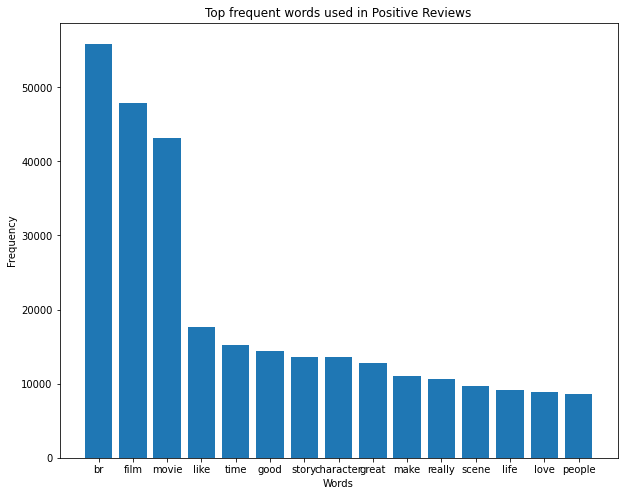

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("clean_reviews.csv")
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['preprocessed_text'][df['sentiment'] == 1])

top_sum=bow.toarray().sum(axis=0)
top_sum_cv=[top_sum]
# to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()
x_traincvdf = pd.DataFrame(top_sum_cv,columns=columns_cv)

import operator
dic = {}
for i in range(len(top_sum_cv[0])):
    dic[columns_cv[i]]=top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:15]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(10,8))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in Positive Reviews')
plt.show()

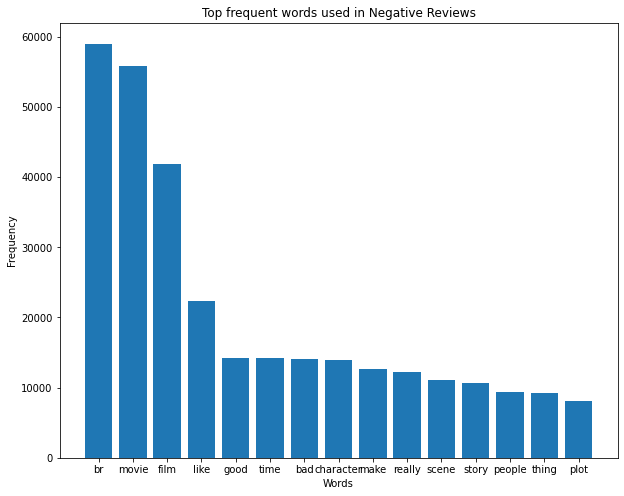

In [27]:
import pandas as pd

df = pd.read_csv("clean_reviews.csv")
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['preprocessed_text'][df['sentiment'] == 0])

top_sum=bow.toarray().sum(axis=0)
top_sum_cv=[top_sum]
# to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()
x_traincvdf = pd.DataFrame(top_sum_cv,columns=columns_cv)


import operator
dic = {}
for i in range(len(top_sum_cv[0])):
    dic[columns_cv[i]]=top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:15]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(10,8))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in Negative Reviews')
plt.show()

In [29]:
import pandas as pd

df = pd.read_csv("clean_reviews.csv")

# Total word count
df['word_count'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))

# Unique_word_count
df['unique_word_count'] = df['preprocessed_text'].apply(lambda x: len(set(str(x).split())))

# Stop_Word_count
df['stop_word_count'] = df['preprocessed_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwordsList ]))
import string
# Mean_word_length
df['mean_word_length'] = df['preprocessed_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Char_count
df['char_count'] = df['preprocessed_text'].apply(lambda x: len(str(x)))

C:\Users\SRIRAM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SRIRAM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SRIRAM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

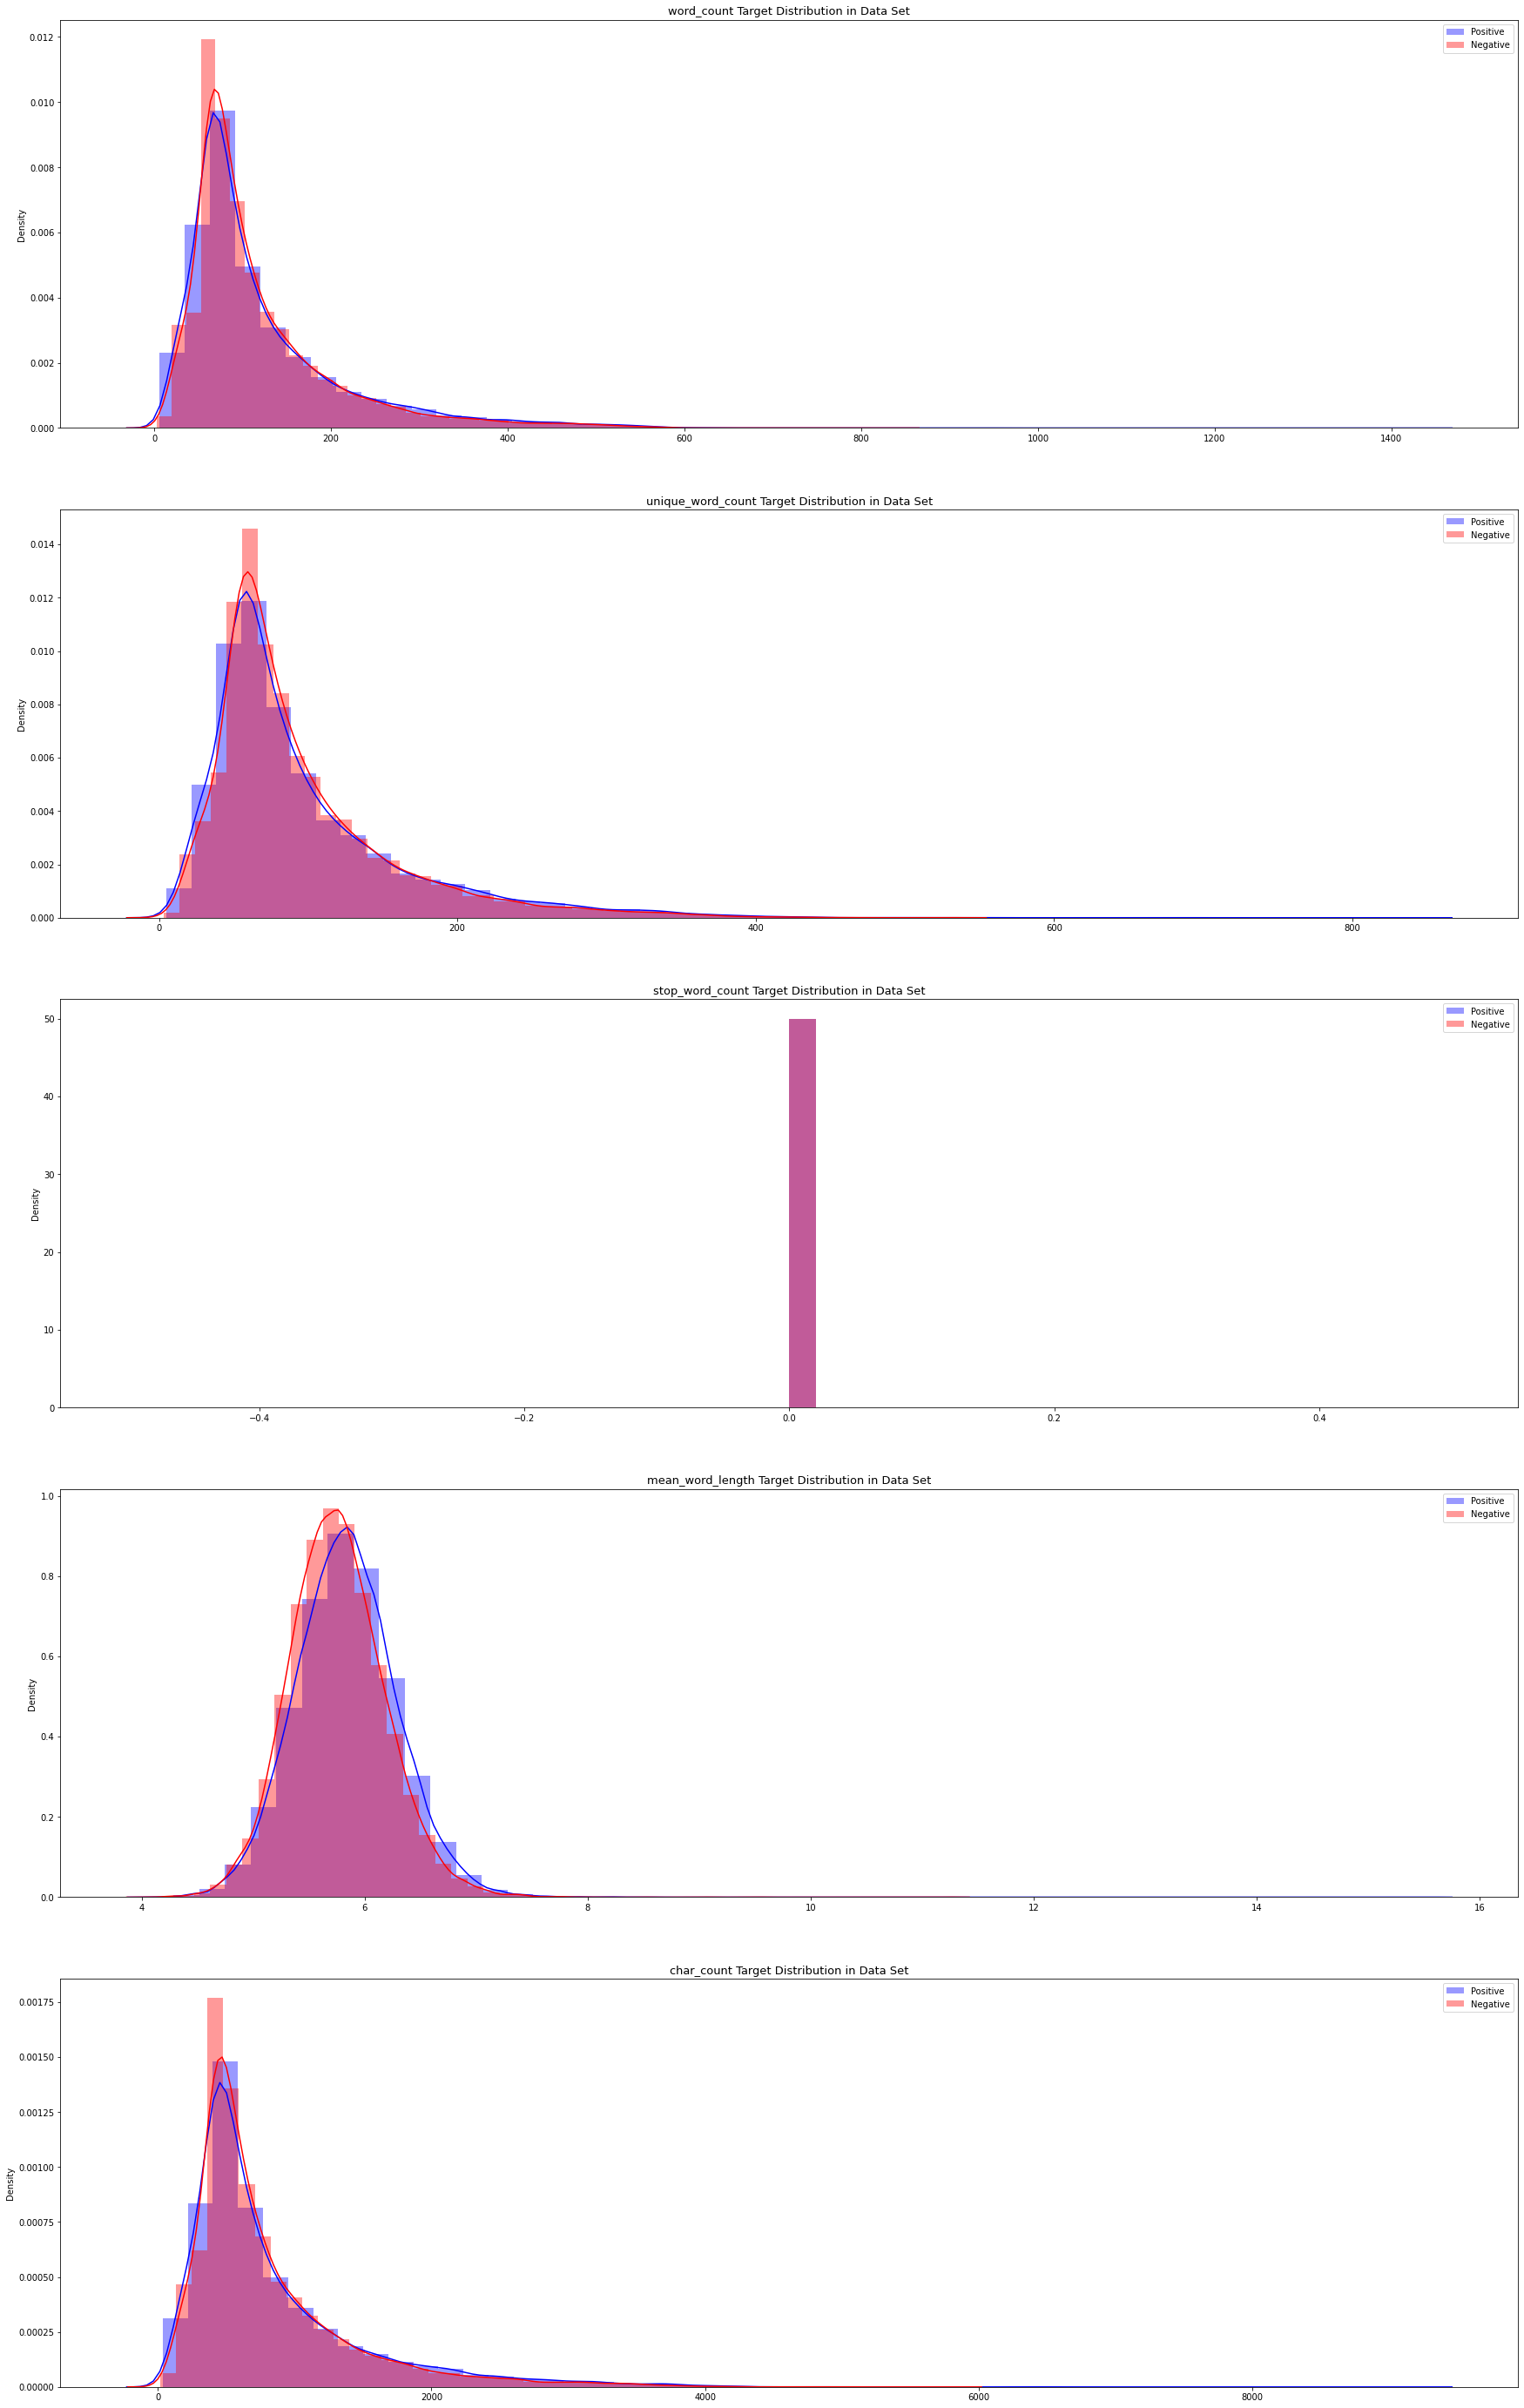

In [31]:
import seaborn as sns
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count','mean_word_length','char_count']

pos = dataframe['sentiment'] == 1
neg = dataframe['sentiment'] == 0

fig, axes = plt.subplots(nrows=len(METAFEATURES), figsize=(30, 50))
for i, feature in enumerate(METAFEATURES):
    sns.distplot(df.loc[pos][feature], label='Positive', ax=axes[i], color='blue')
    sns.distplot(df.loc[neg][feature], label='Negative', ax=axes[i], color='red')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].legend()
    axes[i].set_title(f'{feature} Target Distribution in Data Set', fontsize=13)

plt.show()